In [2]:
from ipynb.fs.full.converter import main_df
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import parallel_coordinates


In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

<h1> Distribution: Histogram </h1>
<p> Let's go ahead and take a look at distributions of different numerical and categorical values. </p>

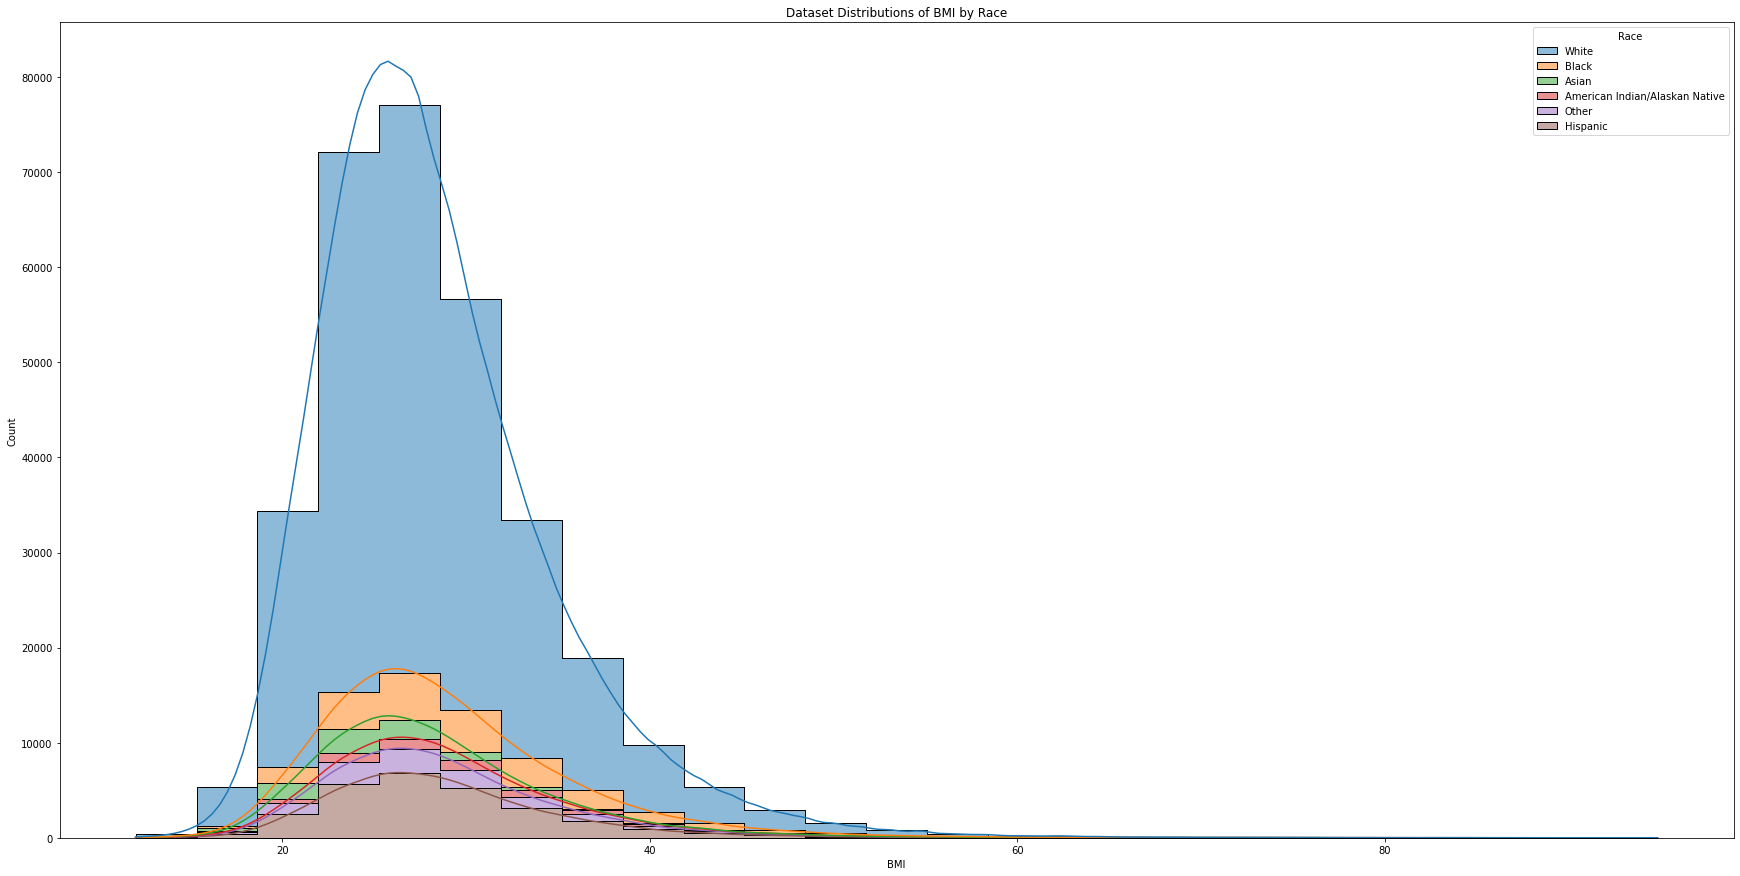

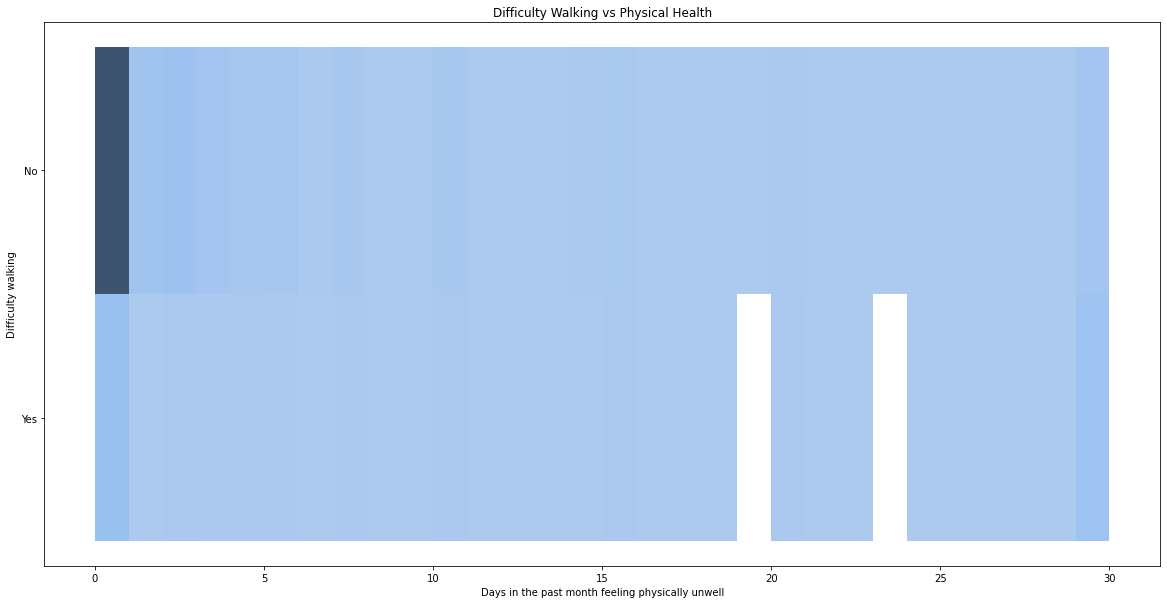

In [85]:
plt.figure(figsize=(30, 15))
sns.histplot(data=main_df, x="BMI", kde=True, hue="Race", multiple="stack", element="step", common_norm=True, bins=25)
plt.title("Dataset Distributions of BMI by Race")
plt.show()

plt.figure(figsize=(20, 10))
sns.histplot(data=main_df, x="PhysicalHealth", y="DiffWalking", bins=30, common_norm=True, pthresh=0.0001, stat="density")
plt.title("Difficulty Walking vs Physical Health")
plt.xlabel("Days in the past month feeling physically unwell")
plt.ylabel("Difficulty walking")
plt.show()

<h1> Ranking: Bar Chart </h1>
<p> What do we want to rank by? We can rank by any numerical value, so that gives us BMI, Physical or Mental Health, and Sleep Time.</p>
<p> Let's start with BMI. This will be our Y axis (height). </p>
<p> What should our different sets of bars be? Let's try the response to each disease first. </p>
<p> Sets: Diseases (Heart Disease, Kidney Disease, Diabetic, Skin Cancer) </p>
<p> Bars: Values for diseases (Yes, No) </p>
<p> So we'll want a dataframe that contains BMI and diseases. </p>

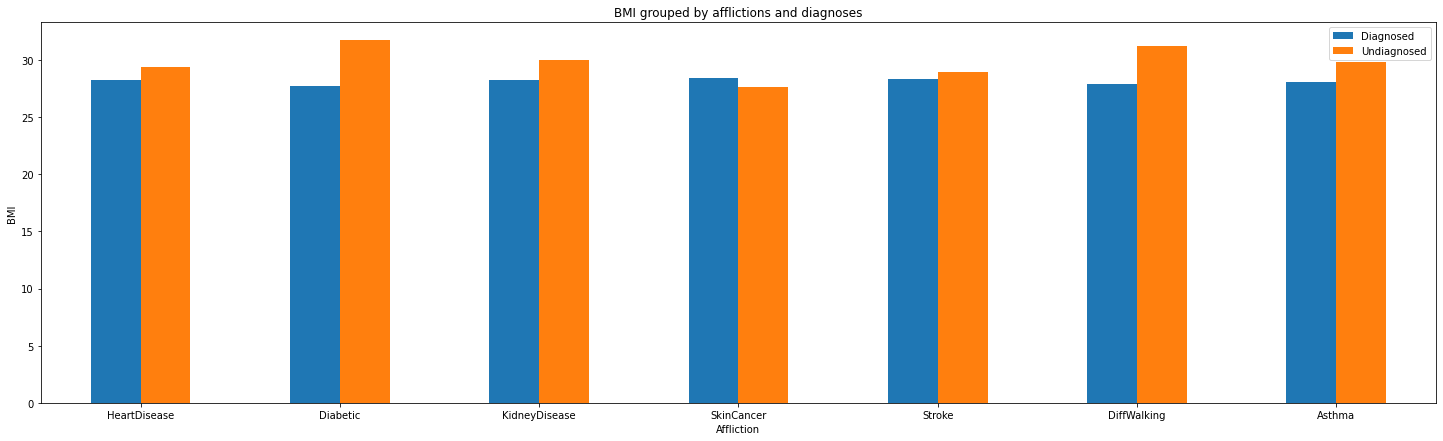

In [10]:
columns = ["BMI", "HeartDisease", "Diabetic", "KidneyDisease", "SkinCancer", "Stroke", "DiffWalking", "Asthma"]
heart = main_df[columns].groupby(["HeartDisease"]).BMI.mean()
diabetes = main_df[columns].groupby(["Diabetic"]).BMI.mean()
kidney = main_df[columns].groupby(["KidneyDisease"]).BMI.mean()
cancer = main_df[columns].groupby(["SkinCancer"]).BMI.mean()
stroke = main_df[columns].groupby(["Stroke"]).BMI.mean()
walking = main_df[columns].groupby(["DiffWalking"]).BMI.mean()
asthma = main_df[columns].groupby(["Asthma"]).BMI.mean()
no_bars = [heart.No, diabetes.No, kidney.No, cancer.No, stroke.No, walking.No, asthma.No]
yes_bars = [heart.Yes, diabetes.Yes, kidney.Yes, cancer.Yes, stroke.Yes, walking.Yes, asthma.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'Diagnosed':no_bars,
                    'Undiagnosed':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.title("BMI Grouped by Afflictions and Diagnoses")
plt.xlabel("Affliction")
plt.ylabel("BMI")
plt.show()


<p>Let's examine BMI over polar non-disease categories. </p>

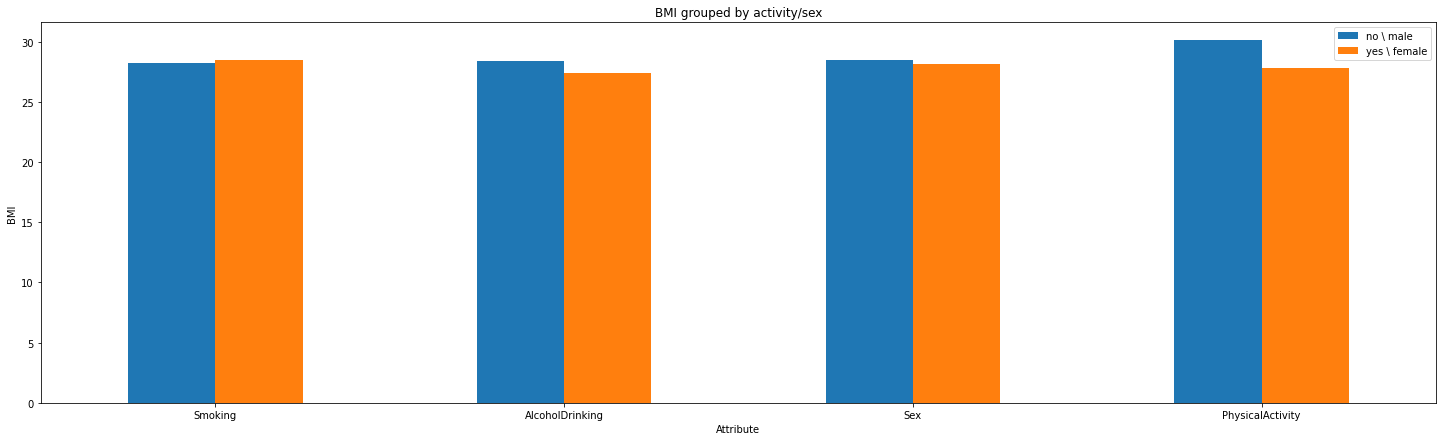

In [14]:
columns = ["BMI", "Smoking", "AlcoholDrinking", "Sex", "PhysicalActivity"]
smoke = main_df[columns].groupby(["Smoking"]).BMI.mean()
drank = main_df[columns].groupby(["AlcoholDrinking"]).BMI.mean()
sex = main_df[columns].groupby(["Sex"]).BMI.mean()
pa = main_df[columns].groupby(["PhysicalActivity"]).BMI.mean()
no_bars = [smoke.No, drank.No, sex.Male, pa.No]
yes_bars = [smoke.Yes, drank.Yes, sex.Female, pa.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'no \ male':no_bars,
                    'yes \ female':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.title("BMI Grouped by Activity/Sex")
plt.xlabel("Attribute")
plt.ylabel("BMI")
plt.show()

<p> Let's go ahead and look at the rest of the variables and compare them to BMI. </p>

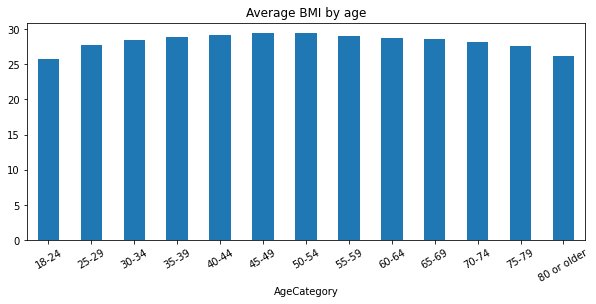

In [61]:
columns = ["BMI", "AgeCategory"]
age = main_df[columns].groupby(["AgeCategory"]).BMI.mean()
age.plot.bar(figsize=(10, 4), rot=30)
plt.title("Average BMI by Age")
plt.show()


<p> We can order this by BMI to see the rankings better and we can turn it into a circular bar chart for more visual attractiveness. </p>
<p> That being said, the circular bar charts don't have quantities, so these charts are mainly for comparison. </p>

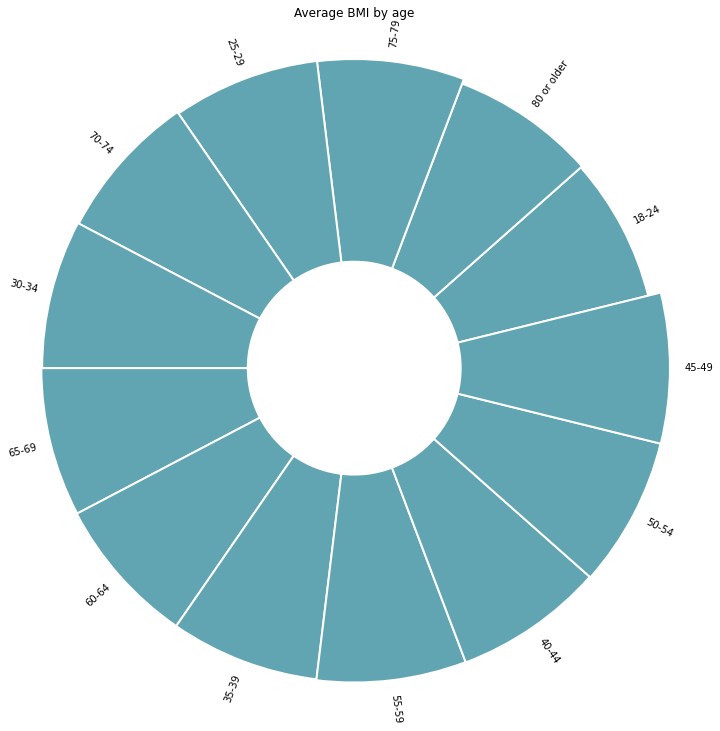

In [66]:
age = age.reset_index().sort_values(by=["BMI"])
age

plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 40
lowerLimit = 15

labelPadding = 2

max = age['BMI'].max()
slope = (max - lowerLimit) / max
heights = slope * age.BMI + lowerLimit 
width = 2*np.pi / len(age.index)
indexes = list(range(1, len(age.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, age["AgeCategory"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average BMI by Age")
plt.show()



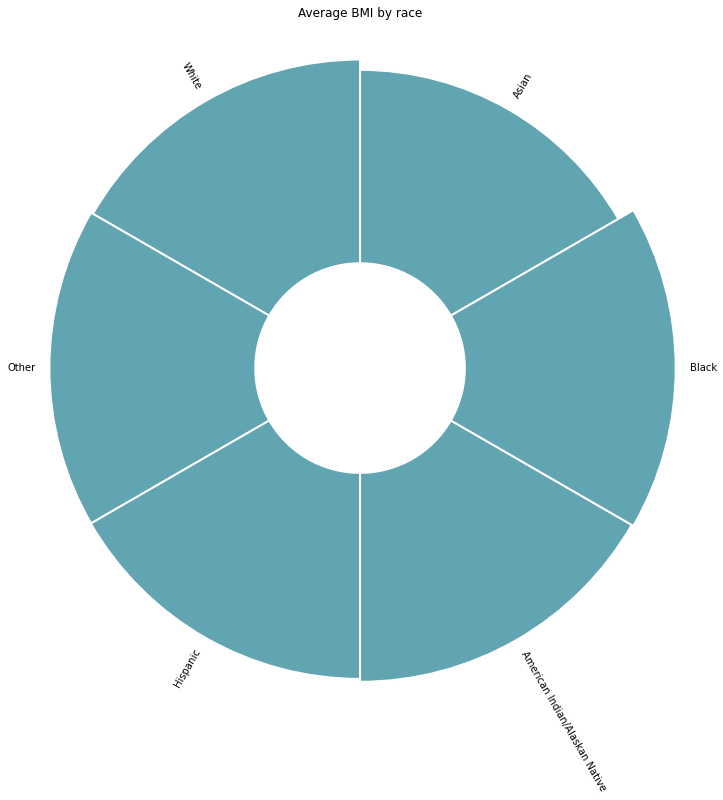

In [67]:
columns = ["BMI", "Race"]
race = main_df[columns].groupby(["Race"]).BMI.mean().reset_index().sort_values(by=["BMI"])

plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 40
lowerLimit = 15

labelPadding = 2

max = race['BMI'].max()
slope = (max - lowerLimit) / max
heights = slope * race.BMI + lowerLimit 
width = 2*np.pi / len(race.index)
indexes = list(range(1, len(race.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, race["Race"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average BMI by Race")
plt.show()

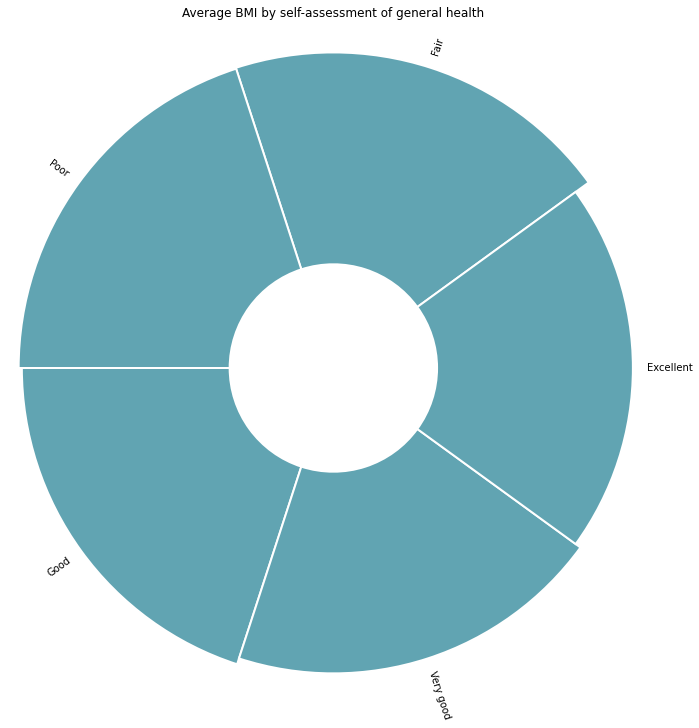

In [86]:
columns = ["BMI", "GenHealth"]
gen_health = main_df[columns].groupby(["GenHealth"]).BMI.mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 40
lowerLimit = 15

labelPadding = 2

max = gen_health['BMI'].max()
slope = (max - lowerLimit) / max
heights = slope * gen_health.BMI + lowerLimit 
width = 2*np.pi / len(gen_health.index)
indexes = list(range(1, len(gen_health.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, gen_health["GenHealth"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average BMI by Self-assessment of General Health")
plt.show()


<h3> Great! Here were the top insights we got from ranking BMI against other features: </h3>
<p> - Diabetics and those who had difficulty walking tended to have higher on average BMI. </p>
<p> - Those who drank alcohol, those who exercised, and those who were on the more positive end of their general health response had a lower average BMI. </p>
<p> - Age extremes tend to have a lower BMI, which makes sense. </p>
<p> - Not much variance in BMI for age, race, and general health categories. The youngest patients, patients of asian descent, and those who felt they were in excellent general health all had the lowest average BMI in their respective categories. </p>

<h3> Now we'll do the same for the other 3 numerical values! </h3>

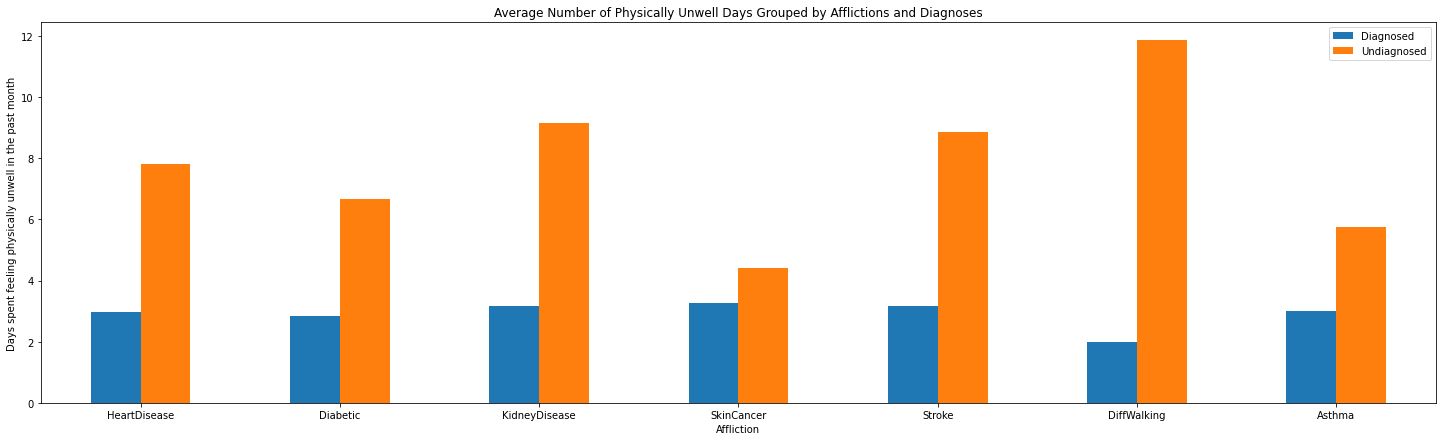

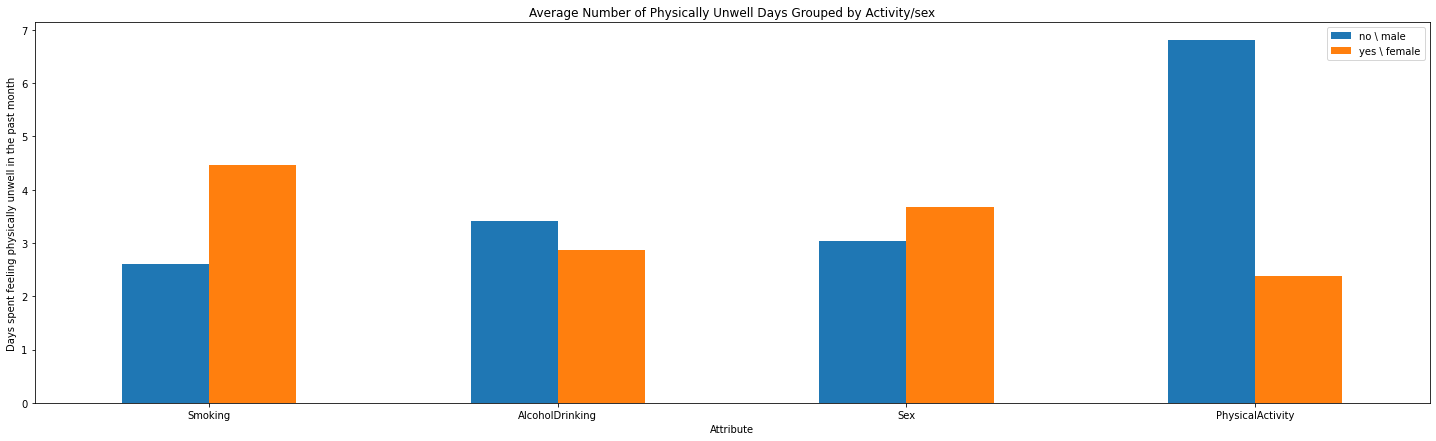

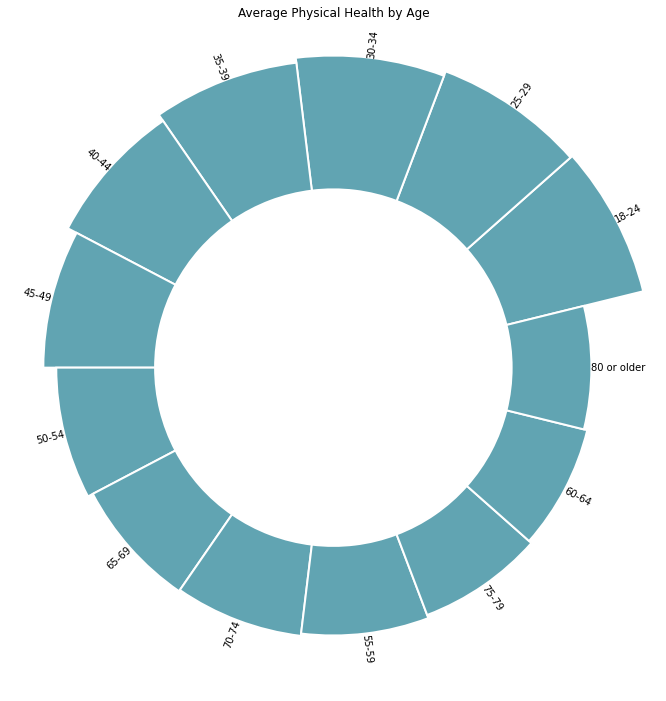

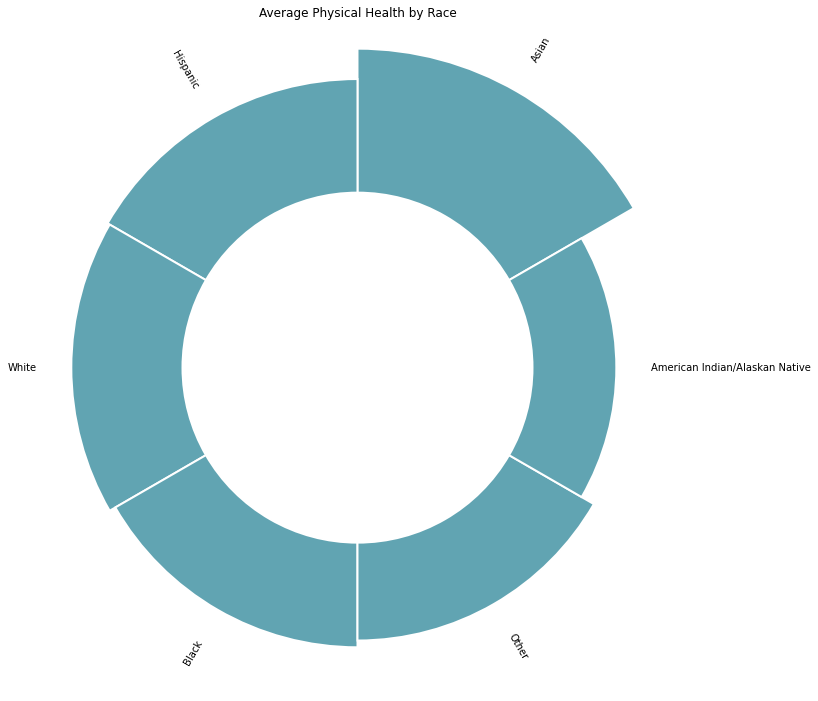

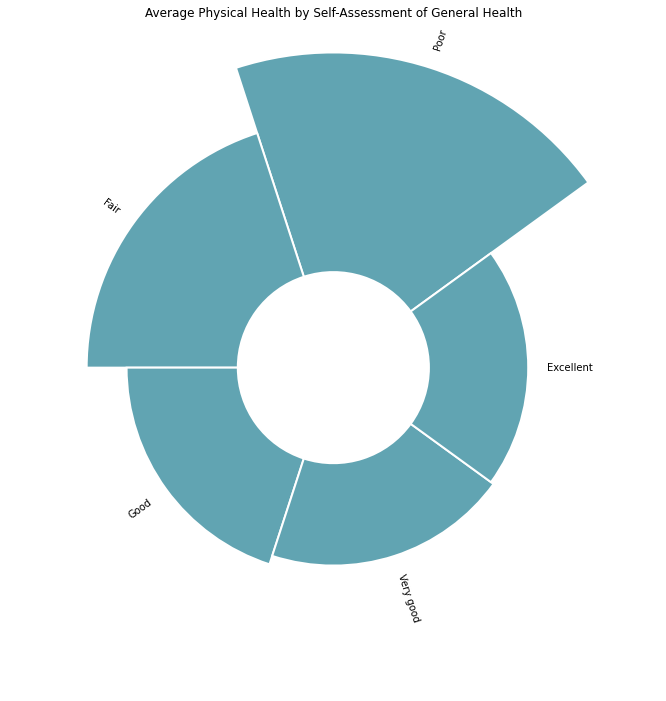

In [87]:
columns = ["PhysicalHealth", "HeartDisease", "Diabetic", "KidneyDisease", "SkinCancer", "Stroke", "DiffWalking", "Asthma"]
heart = main_df[columns].groupby(["HeartDisease"]).PhysicalHealth.mean()
diabetes = main_df[columns].groupby(["Diabetic"]).PhysicalHealth.mean()
kidney = main_df[columns].groupby(["KidneyDisease"]).PhysicalHealth.mean()
cancer = main_df[columns].groupby(["SkinCancer"]).PhysicalHealth.mean()
stroke = main_df[columns].groupby(["Stroke"]).PhysicalHealth.mean()
walking = main_df[columns].groupby(["DiffWalking"]).PhysicalHealth.mean()
asthma = main_df[columns].groupby(["Asthma"]).PhysicalHealth.mean()
no_bars = [heart.No, diabetes.No, kidney.No, cancer.No, stroke.No, walking.No, asthma.No]
yes_bars = [heart.Yes, diabetes.Yes, kidney.Yes, cancer.Yes, stroke.Yes, walking.Yes, asthma.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'Diagnosed':no_bars,
                    'Undiagnosed':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.title("Average Number of Physically Unwell Days Grouped by Afflictions and Diagnoses")
plt.xlabel("Affliction")
plt.ylabel("Days spent feeling physically unwell in the past month")
plt.show()

columns = ["PhysicalHealth", "Smoking", "AlcoholDrinking", "Sex", "PhysicalActivity"]
smoke = main_df[columns].groupby(["Smoking"]).PhysicalHealth.mean()
drank = main_df[columns].groupby(["AlcoholDrinking"]).PhysicalHealth.mean()
sex = main_df[columns].groupby(["Sex"]).PhysicalHealth.mean()
pa = main_df[columns].groupby(["PhysicalActivity"]).PhysicalHealth.mean()
no_bars = [smoke.No, drank.No, sex.Male, pa.No]
yes_bars = [smoke.Yes, drank.Yes, sex.Female, pa.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'no \ male':no_bars,
                    'yes \ female':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.title("Average Number of Physically Unwell Days Grouped by Activity/sex")
plt.xlabel("Attribute")
plt.ylabel("Days spent feeling physically unwell in the past month")
plt.show()

columns = ["PhysicalHealth", "AgeCategory"]
age = main_df[columns].groupby(["AgeCategory"]).PhysicalHealth.mean().reset_index().sort_values(by=["PhysicalHealth"])
plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 30
lowerLimit = 10

labelPadding = 0

max = age['PhysicalHealth'].max()
slope = (max - lowerLimit) / max
heights = slope * age.PhysicalHealth + lowerLimit 
width = 2*np.pi / len(age.index)
indexes = list(range(1, len(age.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, age["AgeCategory"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average Physical Health by Age")
plt.show()

columns = ["PhysicalHealth", "Race"]
race = main_df[columns].groupby(["Race"]).PhysicalHealth.mean().reset_index().sort_values(by=["PhysicalHealth"])
plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 30
lowerLimit = 10

labelPadding = 2

max = race['PhysicalHealth'].max()
slope = (max - lowerLimit) / max
heights = slope * race.PhysicalHealth + lowerLimit 
width = 2*np.pi / len(race.index)
indexes = list(range(1, len(race.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, race["Race"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average Physical Health by Race")
plt.show()

columns = ["PhysicalHealth", "GenHealth"]
gen_health = main_df[columns].groupby(["GenHealth"]).PhysicalHealth.mean().sort_values(ascending=False).reset_index()


plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 30
lowerLimit = 10

labelPadding = 2

max = gen_health['PhysicalHealth'].max()
slope = (max - lowerLimit) / max
heights = slope * gen_health.PhysicalHealth + lowerLimit 
width = 2*np.pi / len(gen_health.index)
indexes = list(range(1, len(gen_health.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, gen_health["GenHealth"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average Physical Health by Self-Assessment of General Health")
plt.show()



<p> For days in the past month feeling physically unwell: </p>
<p> - Patients who had difficulty walking, had a stroke in the past, or had kidney disease all had higher changes to average physical sick days than patients with heart disease. </p>
<p> - Patients who did not exercise had more physical sick days. </p>
<p> - Age and race have similar averages for physical health. As expected, those who felt they were in poor general health tended to have a much higher number of sick days on average. </p>

<h3> Next: Days in the past month spent feeling mentally unwell </h3>

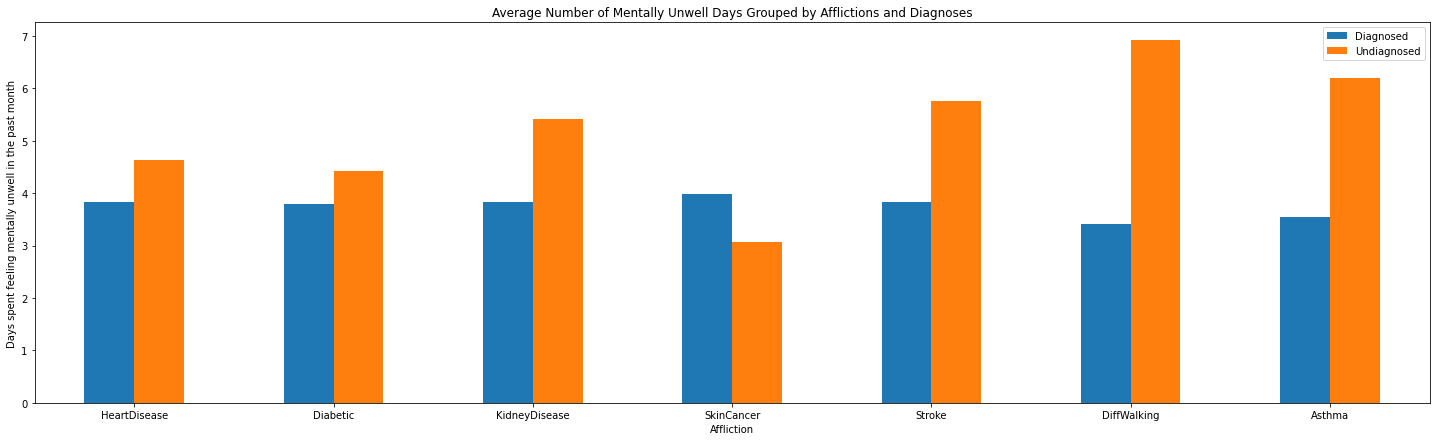

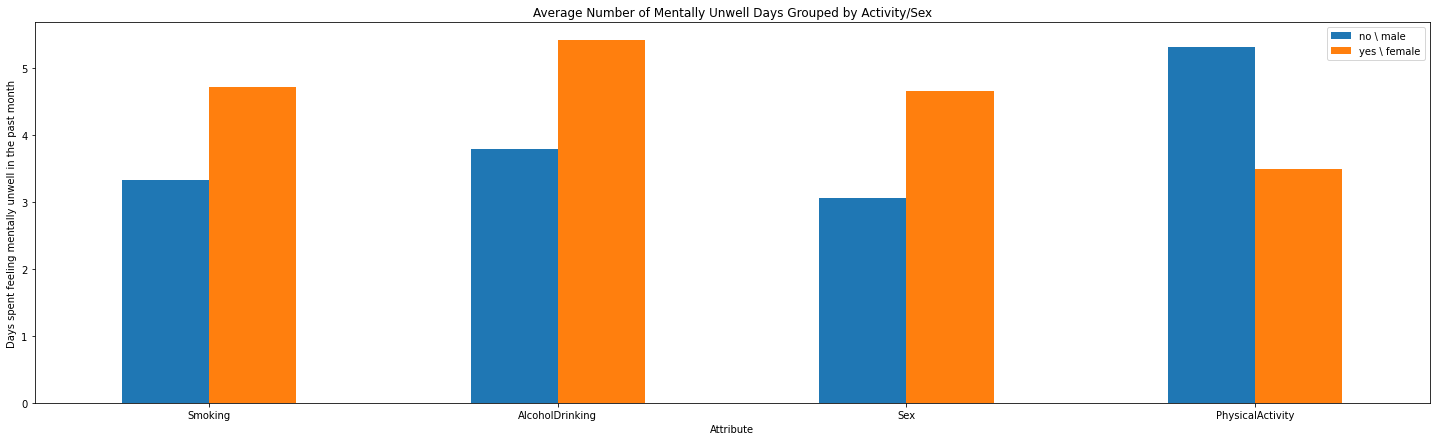

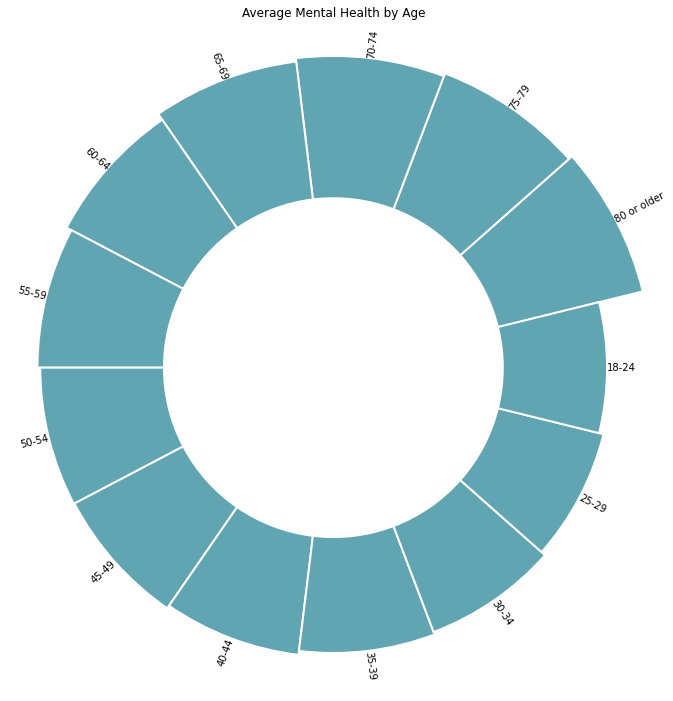

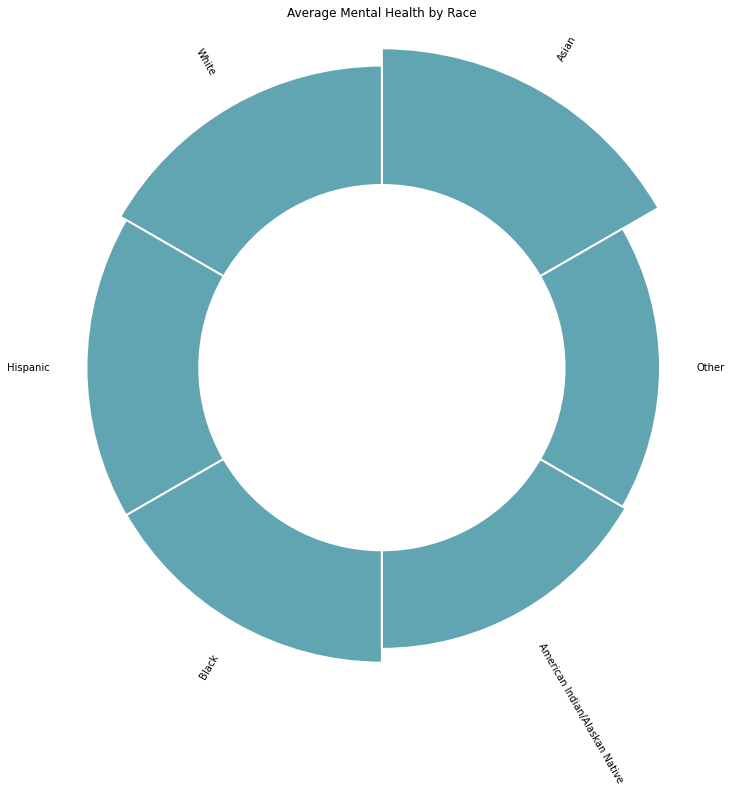

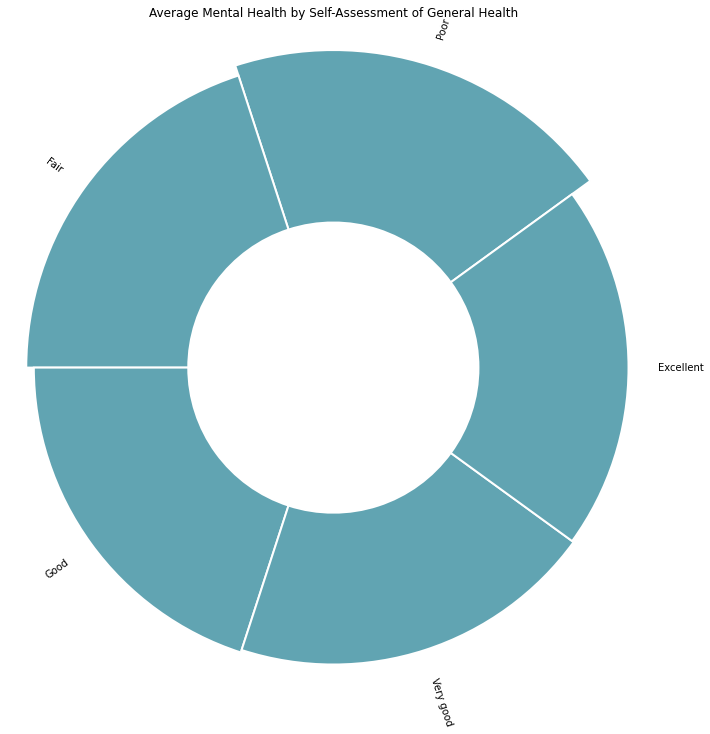

In [88]:
columns = ["MentalHealth", "HeartDisease", "Diabetic", "KidneyDisease", "SkinCancer", "Stroke", "DiffWalking", "Asthma"]
heart = main_df[columns].groupby(["HeartDisease"]).MentalHealth.mean()
diabetes = main_df[columns].groupby(["Diabetic"]).MentalHealth.mean()
kidney = main_df[columns].groupby(["KidneyDisease"]).MentalHealth.mean()
cancer = main_df[columns].groupby(["SkinCancer"]).MentalHealth.mean()
stroke = main_df[columns].groupby(["Stroke"]).MentalHealth.mean()
walking = main_df[columns].groupby(["DiffWalking"]).MentalHealth.mean()
asthma = main_df[columns].groupby(["Asthma"]).MentalHealth.mean()
no_bars = [heart.No, diabetes.No, kidney.No, cancer.No, stroke.No, walking.No, asthma.No]
yes_bars = [heart.Yes, diabetes.Yes, kidney.Yes, cancer.Yes, stroke.Yes, walking.Yes, asthma.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'Diagnosed':no_bars,
                    'Undiagnosed':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.title("Average Number of Mentally Unwell Days Grouped by Afflictions and Diagnoses")
plt.xlabel("Affliction")
plt.ylabel("Days spent feeling mentally unwell in the past month")
plt.show()

columns = ["MentalHealth", "Smoking", "AlcoholDrinking", "Sex", "PhysicalActivity"]
smoke = main_df[columns].groupby(["Smoking"]).MentalHealth.mean()
drank = main_df[columns].groupby(["AlcoholDrinking"]).MentalHealth.mean()
sex = main_df[columns].groupby(["Sex"]).MentalHealth.mean()
pa = main_df[columns].groupby(["PhysicalActivity"]).MentalHealth.mean()
no_bars = [smoke.No, drank.No, sex.Male, pa.No]
yes_bars = [smoke.Yes, drank.Yes, sex.Female, pa.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'no \ male':no_bars,
                    'yes \ female':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.title("Average Number of Mentally Unwell Days Grouped by Activity/Sex")
plt.xlabel("Attribute")
plt.ylabel("Days spent feeling mentally unwell in the past month")
plt.show()

columns = ["MentalHealth", "AgeCategory"]
age = main_df[columns].groupby(["AgeCategory"]).MentalHealth.mean().reset_index().sort_values(by=["MentalHealth"])
plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 30
lowerLimit = 10

labelPadding = 0

max = age['MentalHealth'].max()
slope = (max - lowerLimit) / max
heights = slope * age.MentalHealth + lowerLimit 
width = 2*np.pi / len(age.index)
indexes = list(range(1, len(age.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, age["AgeCategory"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average Mental Health by Age")
plt.show()

columns = ["MentalHealth", "Race"]
race = main_df[columns].groupby(["Race"]).MentalHealth.mean().reset_index().sort_values(by=["MentalHealth"])
plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 30
lowerLimit = 10

labelPadding = 2

max = race['MentalHealth'].max()
slope = (max - lowerLimit) / max
heights = slope * race.MentalHealth + lowerLimit 
width = 2*np.pi / len(race.index)
indexes = list(range(1, len(race.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, race["Race"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average Mental Health by Race")
plt.show()

columns = ["MentalHealth", "GenHealth"]
gen_health = main_df[columns].groupby(["GenHealth"]).MentalHealth.mean().sort_values(ascending=False).reset_index()


plt.figure(figsize=(20, 12))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 30
lowerLimit = 10

labelPadding = 2

max = gen_health['MentalHealth'].max()
slope = (max - lowerLimit) / max
heights = slope * gen_health.MentalHealth + lowerLimit 
width = 2*np.pi / len(gen_health.index)
indexes = list(range(1, len(gen_health.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color='#61a4b2'
)

for bar, angle, height, label in zip(bars, angles, heights, gen_health["GenHealth"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )

plt.title("Average Mental Health by Self-Assessment of General Health")
plt.show()

<h3> Mental Wellbeing insights: </h3>
<p> - Patients who have had a stroke, difficulty walking, or asthma all note more days feeling mentally unwell than those with heart disease. </p>
<p> - There's a significant positive correlation between more mental sick days and all of the following: smokers, alcoholics, non-exercisers, and women. </p>
<p> - Age category correlation compared to physical sick days is flipped: More old people feel physically unwell, more young people feel mentally unwell. </p>
<p> - Those of asian descent report the most physical and mental sick days. Could this be bias? </p>

<h3> Next: Sleep Time in Hours </h3>

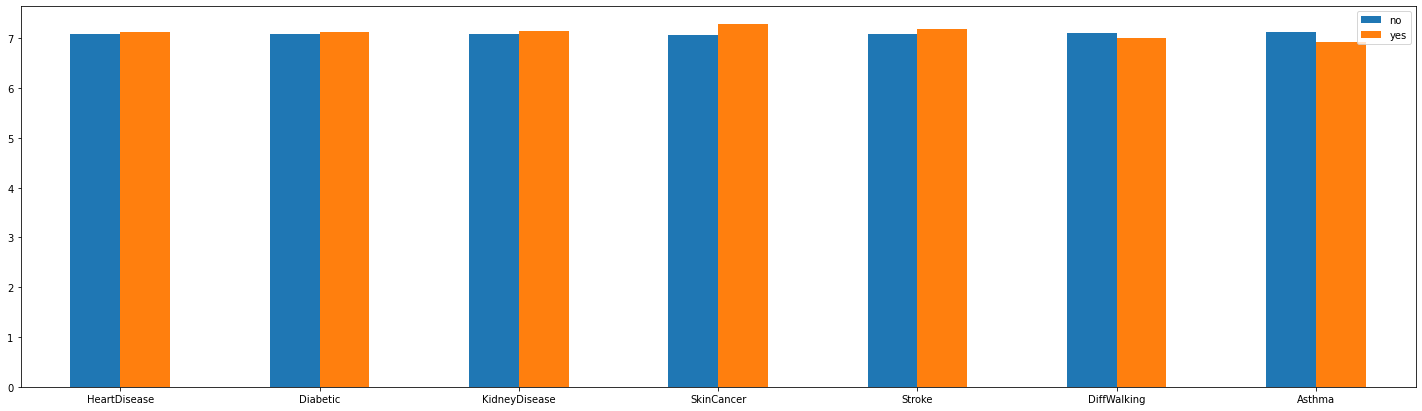

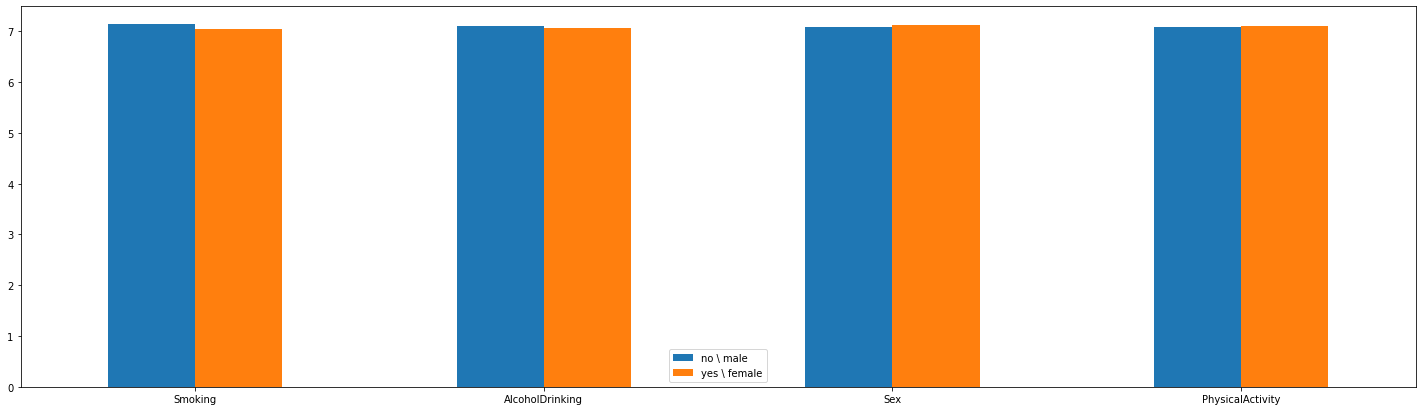

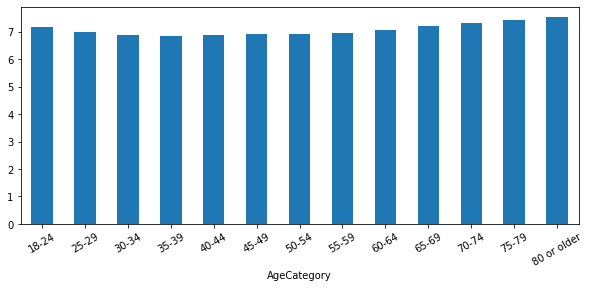

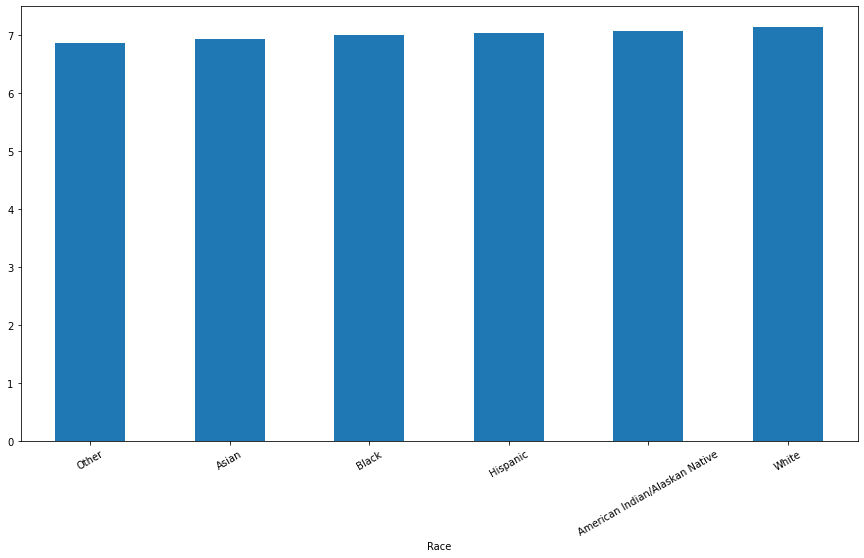

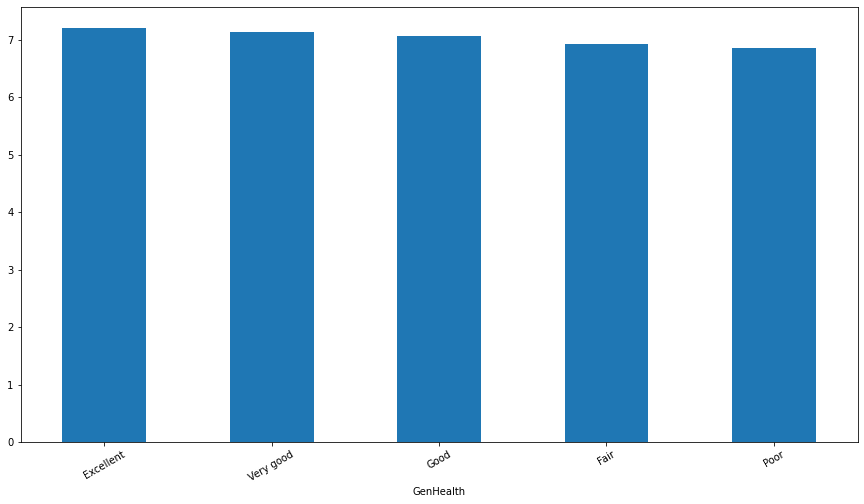

In [11]:
columns = ["SleepTime", "HeartDisease", "Diabetic", "KidneyDisease", "SkinCancer", "Stroke", "DiffWalking", "Asthma"]
heart = main_df[columns].groupby(["HeartDisease"]).SleepTime.mean()
diabetes = main_df[columns].groupby(["Diabetic"]).SleepTime.mean()
kidney = main_df[columns].groupby(["KidneyDisease"]).SleepTime.mean()
cancer = main_df[columns].groupby(["SkinCancer"]).SleepTime.mean()
stroke = main_df[columns].groupby(["Stroke"]).SleepTime.mean()
walking = main_df[columns].groupby(["DiffWalking"]).SleepTime.mean()
asthma = main_df[columns].groupby(["Asthma"]).SleepTime.mean()
no_bars = [heart.No, diabetes.No, kidney.No, cancer.No, stroke.No, walking.No, asthma.No]
yes_bars = [heart.Yes, diabetes.Yes, kidney.Yes, cancer.Yes, stroke.Yes, walking.Yes, asthma.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'no':no_bars,
                    'yes':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.show()

columns = ["SleepTime", "Smoking", "AlcoholDrinking", "Sex", "PhysicalActivity"]
smoke = main_df[columns].groupby(["Smoking"]).SleepTime.mean()
drank = main_df[columns].groupby(["AlcoholDrinking"]).SleepTime.mean()
sex = main_df[columns].groupby(["Sex"]).SleepTime.mean()
pa = main_df[columns].groupby(["PhysicalActivity"]).SleepTime.mean()
no_bars = [smoke.No, drank.No, sex.Male, pa.No]
yes_bars = [smoke.Yes, drank.Yes, sex.Female, pa.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'no \ male':no_bars,
                    'yes \ female':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.show()

columns = ["SleepTime", "AgeCategory"]
age = main_df[columns].groupby(["AgeCategory"]).SleepTime.mean()
age.plot.bar(figsize=(10, 4), rot=30)
plt.show()

columns = ["SleepTime", "Race"]
race = main_df[columns].groupby(["Race"]).SleepTime.mean().sort_values()
race.plot.bar(rot=30, figsize=(15, 8))
plt.show()

columns = ["SleepTime", "GenHealth"]
gen_health = main_df[columns].groupby(["GenHealth"]).SleepTime.mean().sort_values(ascending=False)
gen_health.plot.bar(rot=30, figsize=(15, 8))
plt.show()

<h5> It doesn't seem like sleep time changes significantly. Among any categories. </h5>

<p> And that's it for ranking! If we want, we can apply other aggregate functions to each group (instead of average) such as max or min, but those aren't as useful. Median and mode may be. </p>